In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing important libraries of machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train=pd.read_csv("co-branded_credit_risk_train.csv")

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.shape

(80000, 49)

## Categorical feature test and train as per initial data

In [4]:
#list of initial categorical columns
list_categorical_columns=list(train.select_dtypes(include = ['object']).columns)

In [6]:
train[list_categorical_columns]= train[list_categorical_columns].replace("missing", np.nan)


In [7]:
train[list_categorical_columns]= train[list_categorical_columns].replace("na", np.nan)

# numerical transformation of a categorical columns

In [9]:
train.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,...,1,73.78,82.547,0.08696,10,0.63899,NaN,0,C,0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,...,0,99.129,NaN,0,13,0.63836,NaN,NaN,L,1
2,230034,1745,0.4001,0.000,0.0,0.0,NaN,2536,NaN,NaN,...,0,NaN,29.29,0,1,1.00000,NaN,0,C,1
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,...,0,96.272,NaN,0.15385,3,0.53241,0,0,L,0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,...,0,115.019,NaN,0,1,0.92665,NaN,NaN,L,0


In [11]:
train[['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6',
       'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13',
       'mvar14', 'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20',
       'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27',
       'mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34',
       'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41',
       'mvar42', 'mvar43', 'mvar44', 'mvar45','mvar46' ]]=train[['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6',
       'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13',
       'mvar14', 'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20',
       'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27',
       'mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34',
       'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41',
       'mvar42', 'mvar43', 'mvar44', 'mvar45','mvar46']].astype(np.float)

# Training data

In [31]:
train.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,...,1.0,73.780,82.547,0.08696,10.0,0.63899,NaN,0.0,C,0
1,230033,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,...,0.0,99.129,NaN,0.00000,13.0,0.63836,NaN,NaN,L,1
2,230034,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,...,0.0,NaN,29.290,0.00000,1.0,1.00000,NaN,0.0,C,1
3,230035,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,...,0.0,96.272,NaN,0.15385,3.0,0.53241,0.0,0.0,L,0
4,230036,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,...,0.0,115.019,NaN,0.00000,1.0,0.92665,NaN,NaN,L,0


In [12]:
data_feature=train.copy()

In [13]:
data_feature.isnull().mean().sort_values(ascending=False)*100

mvar40             78.19625
mvar31             70.27250
mvar41             68.22250
mvar45             56.06875
mvar11             56.02375
mvar23             50.31000
mvar30             45.52125
mvar35             41.26750
mvar15             40.08375
mvar22             36.40500
mvar46             28.48625
mvar21             28.20125
mvar6              23.70500
mvar8              23.70500
mvar24             23.62750
mvar16             23.13750
mvar17             19.80750
mvar18             18.46375
mvar12             17.59750
mvar27             16.51125
mvar9              14.26000
mvar26             13.26250
mvar13             10.44000
mvar44              9.68125
mvar37              9.63250
mvar32              9.63250
mvar25              9.63250
mvar7               9.24250
mvar39              7.55000
mvar2               6.94125
mvar1               4.54875
mvar36              3.62250
mvar42              2.37625
mvar33              2.18875
mvar43              1.02250
mvar20              

In [20]:
selected=list(data_feature.drop(["application_key","default_ind",'mvar47' ],axis=1).columns)

In [21]:
print(data_feature.shape)

(80000, 49)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 48 columns):
application_key    80000 non-null int64
mvar1              76361 non-null float64
mvar2              74447 non-null float64
mvar3              79499 non-null float64
mvar4              79499 non-null float64
mvar5              79499 non-null float64
mvar6              61036 non-null float64
mvar7              72606 non-null float64
mvar8              61036 non-null float64
mvar9              68592 non-null float64
mvar10             79498 non-null float64
mvar11             35181 non-null float64
mvar12             65922 non-null float64
mvar13             71648 non-null float64
mvar14             80000 non-null float64
mvar15             47933 non-null float64
mvar16             61490 non-null float64
mvar17             64154 non-null float64
mvar18             65229 non-null float64
mvar19             79996 non-null float64
mvar20             79498 non-null float64
mvar21     

### correlation on whole feature

In [23]:
import pandas as pd
df = data_feature[selected]
print(df.shape)
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=80000):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 15))

(80000, 46)
Top Absolute Correlations
mvar17  mvar18    0.990621
mvar19  mvar20    0.986397
mvar16  mvar17    0.938673
        mvar18    0.930928
mvar26  mvar27    0.913521
mvar22  mvar23    0.901086
mvar4   mvar46    0.892075
mvar7   mvar10    0.891959
mvar32  mvar37    0.869230
mvar1   mvar42    0.771688
mvar25  mvar27    0.760080
mvar21  mvar22    0.715951
mvar25  mvar26    0.713524
mvar27  mvar32    0.704260
mvar9   mvar32    0.691605
dtype: float64


## checking multicollinarity

In [27]:
# remoing multicollinear feature
from statsmodels.stats.outliers_influence import variance_inflation_factor    
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [29]:
df.head().transpose()

,0,1,2,3,4
mvar1,1696.00000,1846.00000,1745.0000,1739.00000,1787.00000
mvar2,1.65410,0.80950,0.4001,0.21930,0.01180
mvar3,0.00000,0.00000,0.0000,0.00000,0.22500
mvar4,0.00000,0.00000,0.0000,0.00000,0.00000
mvar5,0.00000,0.00000,0.0000,0.00000,0.00000
mvar6,0.00000,102.00000,NaN,1982.00000,5451.00000
mvar7,6015.00000,7532.00000,2536.0000,26440.00000,5494.00000
mvar8,322.00000,3171.00000,NaN,4955.00000,5494.00000
mvar9,40369.00000,18234.00000,NaN,20316.00000,7987.00000
mvar10,18414.00000,13664.00000,2536.0000,37013.00000,4696.00000


In [30]:
calculate_vif_(df.dropna(),5.0)

dropping 'mvar20' at index: 19
dropping 'mvar17' at index: 16
dropping 'mvar1' at index: 0
dropping 'mvar32' at index: 28
dropping 'mvar22' at index: 18
dropping 'mvar29' at index: 24
dropping 'mvar21' at index: 17
dropping 'mvar36' at index: 28
dropping 'mvar10' at index: 8
dropping 'mvar25' at index: 18
dropping 'mvar40' at index: 29
dropping 'mvar38' at index: 27
dropping 'mvar41' at index: 28
dropping 'mvar26' at index: 18
dropping 'mvar18' at index: 14
dropping 'mvar44' at index: 28
dropping 'mvar9' at index: 7
dropping 'mvar42' at index: 25
dropping 'mvar31' at index: 19
Remaining variables:
Index(['mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8', 'mvar11',
       'mvar12', 'mvar13', 'mvar14', 'mvar15', 'mvar16', 'mvar19', 'mvar23',
       'mvar24', 'mvar27', 'mvar28', 'mvar30', 'mvar33', 'mvar34', 'mvar35',
       'mvar37', 'mvar39', 'mvar43', 'mvar45', 'mvar46'],
      dtype='object')


,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar11,mvar12,mvar13,...,mvar28,mvar30,mvar33,mvar34,mvar35,mvar37,mvar39,mvar43,mvar45,mvar46
916,1.5976,7.793,1.666,1.088,297.0,25808.0,25808.0,9802.0,8877.0,0.0,...,61.0,5505.0,0.3333,1.0,0.0,3.0,1.0,1.0,0.0,0.0
945,1.3268,0.000,0.000,0.000,0.0,9180.0,1059.0,760.0,8870.0,9143.0,...,2251.0,30.0,12.2500,0.0,0.0,3.0,0.0,14.0,0.0,0.0
1173,1.4084,6.050,0.000,0.000,705.0,28957.0,5469.0,52.0,15854.0,34306.0,...,30.0,3772.0,6.7500,1.0,0.0,8.0,0.0,7.0,0.0,0.0
1557,2.5982,9.402,0.000,0.000,25.0,11431.0,11431.0,629.0,16297.0,7331.0,...,0.0,487.0,3.9167,0.0,0.0,1.0,0.0,21.0,0.0,0.0
1862,1.1823,1.439,0.622,0.000,0.0,15496.0,3330.0,2077.0,15137.0,11514.0,...,0.0,3437.0,10.2500,0.0,1.0,2.0,0.0,18.0,0.0,0.0
2086,1.6944,1.749,0.725,0.000,350.0,9402.0,832.0,1305.0,3902.0,611.0,...,0.0,3011.0,0.8333,1.0,0.0,9.0,0.0,8.0,0.0,0.0
2406,1.3068,0.000,0.000,0.000,1314.0,5881.0,4478.0,32.0,5688.0,8679.0,...,913.0,1065.0,10.0833,0.0,0.0,3.0,0.0,10.0,0.0,0.0
2625,2.8901,38.287,3.146,0.544,149.0,16736.0,496.0,4777.0,1575.0,861.0,...,0.0,2677.0,13.6667,1.0,0.0,9.0,0.0,6.0,0.0,0.0
2760,1.1572,2.000,0.000,2.000,668.0,11479.0,2973.0,26.0,19994.0,39816.0,...,152.0,3255.0,16.5000,0.0,0.0,14.0,0.0,20.0,0.0,0.0
2826,0.6595,4.363,1.025,0.000,0.0,2482.0,0.0,94.0,3724.0,1649.0,...,0.0,1065.0,3.0000,2.0,1.0,0.0,2.0,16.0,1.0,0.0


Decision trees are by nature immune to multi-collinearity. For example, if you have 2 features which are 99% correlated, when deciding upon a split the tree will choose only one of them. Other models such as Logistic regression would use both the features.

Since boosted trees use individual decision trees, they also are unaffected by multi-collinearity. However, its a good practice to remove any redundant features from any dataset used for training, irrespective of the model's algorithm. In your case since you're deriving new features, you could use this approach, evaluate each feature's importance and retain only the best features for your final model.

The importance matrix of an xgboost model is actually a data.table object with the first column listing the names of all the features actually used in the boosted trees. The second column is the Gain metric which implies the relative contribution of the corresponding feature to the model calculated by taking each feature's contribution for each tree in the model. A higher value of this metric when compared to another feature implies it is more important for generating a prediction.

In [25]:
data_feature.isnull().mean().sort_values(ascending=False)*100

mvar40             78.19625
mvar31             70.27250
mvar41             68.22250
mvar45             56.06875
mvar11             56.02375
mvar23             50.31000
mvar30             45.52125
mvar35             41.26750
mvar15             40.08375
mvar22             36.40500
mvar46             28.48625
mvar21             28.20125
mvar6              23.70500
mvar8              23.70500
mvar24             23.62750
mvar16             23.13750
mvar17             19.80750
mvar18             18.46375
mvar12             17.59750
mvar27             16.51125
mvar9              14.26000
mvar26             13.26250
mvar13             10.44000
mvar44              9.68125
mvar37              9.63250
mvar32              9.63250
mvar25              9.63250
mvar7               9.24250
mvar39              7.55000
mvar2               6.94125
mvar1               4.54875
mvar36              3.62250
mvar42              2.37625
mvar33              2.18875
mvar43              1.02250
mvar20              

In [32]:
data_feature.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,...,1.0,73.780,82.547,0.08696,10.0,0.63899,NaN,0.0,C,0
1,230033,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,...,0.0,99.129,NaN,0.00000,13.0,0.63836,NaN,NaN,L,1
2,230034,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,...,0.0,NaN,29.290,0.00000,1.0,1.00000,NaN,0.0,C,1
3,230035,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,...,0.0,96.272,NaN,0.15385,3.0,0.53241,0.0,0.0,L,0
4,230036,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,...,0.0,115.019,NaN,0.00000,1.0,0.92665,NaN,NaN,L,0


In [48]:
data_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 49 columns):
application_key    80000 non-null int64
mvar1              76361 non-null float64
mvar2              74447 non-null float64
mvar3              79499 non-null float64
mvar4              79499 non-null float64
mvar5              79499 non-null float64
mvar6              61036 non-null float64
mvar7              72606 non-null float64
mvar8              61036 non-null float64
mvar9              68592 non-null float64
mvar10             79498 non-null float64
mvar11             35181 non-null float64
mvar12             65922 non-null float64
mvar13             71648 non-null float64
mvar14             80000 non-null float64
mvar15             47933 non-null float64
mvar16             61490 non-null float64
mvar17             64154 non-null float64
mvar18             65229 non-null float64
mvar19             79996 non-null float64
mvar20             79498 non-null float64
mvar21     

## exploratory analysis

<b>a.	Charge card:</b> The balance is required to be paid in full each month<br>
<b>b.	Lending card: </b>Lending cards allow the customer to pay the balance over a period of time subject to interest being charged

## product wise defaulters

In [33]:
my_tab = pd.crosstab(index=data_feature["mvar47"],  # Make a crosstab
                              columns="default_ind")      # Name the count column

my_tab

col_0,default_ind
mvar47,
C,51840
L,28160


In [53]:
# Table of product vs. defaulters
product_defaulters = pd.crosstab(index=data_feature["mvar47"], 
                           columns=data_feature["default_ind"],margins=True)

product_defaulters.columns = ['defaulters','non_defaulters',"coltotal"]
product_defaulters.index= ["C","L","rowtotal"]

product_defaulters

,defaulters,non_defaulters,coltotal
C,35274,16566,51840
L,25029,3131,28160
rowtotal,60303,19697,80000


In [46]:
data_dictionary=pd.read_csv('Data_Dictionary.csv')

In [47]:
data_dictionary

,Name,Definition
0,application_key,Application ID (primary key)
1,mvar1,Credit worthiness score calculated on the basi...
2,mvar2,A score calculated based on the number and ris...
3,mvar3,Severity of default by the borrower on any loa...
4,mvar4,Severity of default by the borrower on auto lo...
5,mvar5,Severity of default by the borrower on educati...
6,mvar6,Minimum of credit available on all revolving c...
7,mvar7,Maximum of credit available on all active cred...
8,mvar8,Maximum of credit available on all active revo...
9,mvar9,Sum of available credit on credit cards that t...


## segmenting data product wise before imputation

In [55]:
data_train_charge=data_feature[data_feature.mvar47=='C']
data_train_lend=data_feature[data_feature.mvar47=='L']

## removing features with more than 30% missing value

In [65]:
data_train_charge=data_train_charge[data_train_charge.columns[data_train_charge.isnull().mean() < 0.3]]
data_train_lend=data_train_lend[data_train_lend.columns[data_train_lend.isnull().mean() < 0.3]]

In [69]:
print(data_train_lend.shape,data_train_charge.shape)

(28160, 39) (51840, 38)


In [70]:
data_train_charge_index=data_train_charge.set_index(['application_key','mvar47'])
data_train_lend_index=data_train_lend.set_index(['application_key','mvar47'])

In [123]:
print(data_train_charge_index.shape,data_train_lend_index.shape)

(51840, 36) (28160, 37)


In [71]:
## removing redundant features for liniear model
#colliniarity charge
print('charge\n')
print(calculate_vif_(data_train_charge_index.drop("default_ind",axis=1).dropna(),5.0))
#colliniarity lend
print('lending\n')
print(calculate_vif_(data_train_lend_index.drop("default_ind",axis=1).dropna(),5.0))

charge

dropping 'mvar17' at index: 14
dropping 'mvar20' at index: 16
dropping 'mvar1' at index: 0
dropping 'mvar27' at index: 18
dropping 'mvar32' at index: 20
dropping 'mvar43' at index: 27
dropping 'mvar18' at index: 13
dropping 'mvar29' at index: 18
dropping 'mvar10' at index: 8
dropping 'mvar25' at index: 14
dropping 'mvar36' at index: 18
dropping 'mvar44' at index: 22
Remaining variables:
Index(['mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8', 'mvar9',
       'mvar12', 'mvar13', 'mvar14', 'mvar16', 'mvar19', 'mvar24', 'mvar26',
       'mvar28', 'mvar33', 'mvar34', 'mvar37', 'mvar38', 'mvar39', 'mvar42',
       'mvar46'],
      dtype='object')
                          mvar2   mvar3  mvar4   mvar5    mvar6     mvar7  \
application_key mvar47                                                      
230032          C        1.6541   0.000  0.000   0.000      0.0    6015.0   
230043          C        1.5888   5.685  3.566   0.000     93.0    3554.0   
230045          C    

dropping 'mvar17' at index: 14
dropping 'mvar20' at index: 16
dropping 'mvar1' at index: 0
dropping 'mvar32' at index: 22
dropping 'mvar26' at index: 18
dropping 'mvar43' at index: 28
dropping 'mvar10' at index: 8
dropping 'mvar25' at index: 16
dropping 'mvar29' at index: 18
dropping 'mvar18' at index: 12
dropping 'mvar44' at index: 24
dropping 'mvar9' at index: 7
dropping 'mvar36' at index: 18
dropping 'mvar21' at index: 12
Remaining variables:
Index(['mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8', 'mvar12',
       'mvar13', 'mvar14', 'mvar16', 'mvar19', 'mvar24', 'mvar27', 'mvar28',
       'mvar33', 'mvar34', 'mvar37', 'mvar38', 'mvar39', 'mvar42', 'mvar46'],
      dtype='object')
                         mvar2   mvar3  mvar4  mvar5    mvar6     mvar7  \
application_key mvar47                                                    
230040          L       0.1358   0.000  0.000  0.000    347.0   38964.0   
230041          L       0.1981   0.000  0.000  0.000    793.0    613

In [79]:
columns_to_impute_charge=['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar10', 'mvar12', 'mvar13', 'mvar14', 'mvar16', 'mvar17',
       'mvar18', 'mvar19', 'mvar20', 'mvar24', 'mvar25', 'mvar26', 'mvar27',
       'mvar28', 'mvar29', 'mvar32', 'mvar33', 'mvar34', 'mvar36', 'mvar37',
       'mvar38', 'mvar39', 'mvar42', 'mvar43', 'mvar44', 'mvar46']

In [80]:
columns_to_impute_lend=['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar10', 'mvar12', 'mvar13', 'mvar14', 'mvar16', 'mvar17',
       'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar24', 'mvar25', 'mvar26',
       'mvar27', 'mvar28', 'mvar29', 'mvar32', 'mvar33', 'mvar34', 'mvar36',
       'mvar37', 'mvar38', 'mvar39', 'mvar42', 'mvar43', 'mvar44', 'mvar46']

## data imputation

In [74]:
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, MICE, BiScaler

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [81]:
#imputation function()
data_train_charge_index[columns_to_impute_charge]=MICE(n_imputations=100,min_value=0.0,verbose=True).complete(data_train_charge_index[columns_to_impute_charge])
data_train_lend_index[columns_to_impute_lend]=MICE(n_imputations=100,min_value=0.0,verbose=True).complete(data_train_lend_index[columns_to_impute_lend])

[MICE] Completing matrix with shape (51840, 35)
[MICE] Starting imputation round 1/110, elapsed time 0.101
[MICE] Starting imputation round 2/110, elapsed time 2.086
[MICE] Starting imputation round 3/110, elapsed time 3.788
[MICE] Starting imputation round 4/110, elapsed time 5.580
[MICE] Starting imputation round 5/110, elapsed time 7.381
[MICE] Starting imputation round 6/110, elapsed time 9.123
[MICE] Starting imputation round 7/110, elapsed time 11.041
[MICE] Starting imputation round 8/110, elapsed time 12.899
[MICE] Starting imputation round 9/110, elapsed time 14.635
[MICE] Starting imputation round 10/110, elapsed time 16.436
[MICE] Starting imputation round 11/110, elapsed time 18.220
[MICE] Starting imputation round 12/110, elapsed time 19.996
[MICE] Starting imputation round 13/110, elapsed time 21.848
[MICE] Starting imputation round 14/110, elapsed time 23.643
[MICE] Starting imputation round 15/110, elapsed time 25.453
[MICE] Starting imputation round 16/110, elapsed tim

[MICE] Starting imputation round 24/110, elapsed time 22.042
[MICE] Starting imputation round 25/110, elapsed time 23.051
[MICE] Starting imputation round 26/110, elapsed time 24.168
[MICE] Starting imputation round 27/110, elapsed time 25.081
[MICE] Starting imputation round 28/110, elapsed time 26.029
[MICE] Starting imputation round 29/110, elapsed time 27.113
[MICE] Starting imputation round 30/110, elapsed time 28.087
[MICE] Starting imputation round 31/110, elapsed time 29.025
[MICE] Starting imputation round 32/110, elapsed time 30.045
[MICE] Starting imputation round 33/110, elapsed time 31.234
[MICE] Starting imputation round 34/110, elapsed time 32.246
[MICE] Starting imputation round 35/110, elapsed time 33.193
[MICE] Starting imputation round 36/110, elapsed time 34.133
[MICE] Starting imputation round 37/110, elapsed time 35.091
[MICE] Starting imputation round 38/110, elapsed time 36.034
[MICE] Starting imputation round 39/110, elapsed time 37.140
[MICE] Starting imputati

In [82]:
data_train_charge_index.head()

,,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar34,mvar36,mvar37,mvar38,mvar39,mvar42,mvar43,mvar44,mvar46,default_ind
application_key,mvar47,,,,,,,,,,,,,,,,,,,,,
230032,C,1696.000000,1.654100,0.000000,0.000000,0.000000,0.000000,6015.000000,322.000000,40369.000000,18414.000000,...,1.000000,8.00000,10.000000,4.000000,1.000000,0.086960,10.000000,0.638990,0.000000,0
230034,C,1745.000000,0.400100,0.000000,0.000000,0.000000,2301.514406,2536.000000,7005.510290,41890.897350,2536.000000,...,0.000000,1.00000,3.590054,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1
230037,C,1579.000000,1.377686,3.502000,0.000000,0.000000,1896.696222,22661.139578,8062.299946,31329.147020,0.000000,...,0.000000,2.00000,3.803424,2.000000,0.157928,1.500000,0.000000,0.705825,0.222312,1
230038,C,1818.000000,0.400100,0.000000,0.000000,0.000000,2241.634721,1088.000000,6752.314090,1536.000000,1498.000000,...,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.872240,0.000000,1
230039,C,1724.625728,1.357457,7.938386,1.125236,2.525765,2227.534853,23351.743325,7159.143006,35460.429414,31746.769704,...,0.467037,7.80032,3.373451,4.828855,0.284100,0.357325,7.109215,0.736967,0.185853,0


In [83]:
data_train_lend_index.head()

,,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar34,mvar36,mvar37,mvar38,mvar39,mvar42,mvar43,mvar44,mvar46,default_ind
application_key,mvar47,,,,,,,,,,,,,,,,,,,,,
230033,L,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,...,0.0,8.0,0.0,2.0,0.0,0.00000,13.0,0.63836,0.118158,1
230035,L,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,...,0.0,3.0,3.0,2.0,0.0,0.15385,3.0,0.53241,0.000000,0
230036,L,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,...,0.0,2.0,3.0,2.0,0.0,0.00000,1.0,0.92665,0.181548,0
230040,L,1836.0,0.1358,0.000,0.0,0.0,347.0,38964.0,17828.0,70729.0,65843.0,...,0.0,6.0,12.0,2.0,0.0,0.00000,10.0,0.89868,0.000000,0
230041,L,1839.0,0.1981,0.000,0.0,0.0,793.0,6131.0,6045.0,48959.0,31640.0,...,0.0,10.0,7.0,0.0,0.0,0.08824,14.0,0.33834,0.000000,0


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier

## train test data split

In [195]:
from sklearn.model_selection import train_test_split
from pandas_ml import ConfusionMatrix

In [196]:
X_charge = data_train_charge_index.drop('default_ind', axis=1)
y_charge = data_train_charge_index[['default_ind']]
X_train_charge, X_test_charge, y_train_charge, y_test_charge = train_test_split(X_charge, y_charge, test_size=0.3, random_state=42)

In [197]:
X_lend = data_train_lend_index.drop('default_ind', axis=1)
y_lend = data_train_lend_index[['default_ind']]
X_train_lend, X_test_lend, y_train_lend, y_test_lend = train_test_split(X_lend, y_lend, test_size=0.3, random_state=42)

## precision recall function

In [198]:
def precision_recall_plot(y_test,y_score):
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    average_precision = average_precision_score(y_test, y_score)
    print('Average precision score: {0:0.4f} '.format(average_precision))
    #plot Precision and Recall for a given threshold.
    plt.title('Precision and Recall')
    plt.plot(thresholds,precision[1:],'purple',label='Precision')
    plt.plot(thresholds,recall[1:],'orange', label='Recall')
    plt.axvline(x=0.5,linestyle=":")
    plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
    plt.xlim([0.4,0.6])
    plt.ylim([0,1])
    plt.ylabel('Precision and Recall Values')
    plt.xlabel('Threshold')
    return plt.show()

## confusion matrix function

In [199]:
def plot_confusion_matrix(y_score,y_test,threshold):
    y_prob_test=pd.DataFrame(y_score[:,1],columns=['prob'])
    y_prob_test_class=y_prob_test['prob'].apply(lambda x: 0 if x < threshold else 1)
    y_prob_test_class=np.array(y_prob_test_class)
    #Confusion Matrix
    from pandas_ml import ConfusionMatrix
    confusion_matrix = ConfusionMatrix(y_test, y_prob_test_class)
    print("Confusion matrix:\n%s" % confusion_matrix)

## RFE 

In [200]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression

In [201]:
def rfe_function(estimator,n_features,X_train,y_train):
    selector = RFE(estimator, n_features, step=1,verbose=1)
    selector = selector.fit(X_train, y_train)
    print("Num Features: %d"% selector.n_features_) 
    print("Selected Features: %s"% selector.support_) 
    print("Feature Ranking: %s"% selector.ranking_)
    selected = X_train.columns[selector.support_]
    return selected

## feature importance function

In [202]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    from xgboost.core     import XGBoostError
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except (XGBoostError, ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

## L2 REGULARISED LOGISTIC REGRESSION

In [203]:
%%time
def model_training_parameter(X_train,y_train,X_test,y_test,feature_selected):
    for c in [0.01,0.001,0.05,0.1,0.5,1]:#iterating using maxdepth
        logit_reg = LogisticRegression(penalty = 'l2', C = c,class_weight="balanced",dual=False).fit(X_train[feature_selected], y_train)
        y_score_logit_reg = logit_reg.predict_proba(X_test[feature_selected])
        y_score_logit_train=logit_reg.predict_proba(X_train[feature_selected])
        fpr_logit_reg, tpr_logit_reg, _ = roc_curve(y_test, y_score_logit_reg[:,1])
        roc_auc_logit_reg = auc(fpr_logit_reg, tpr_logit_reg)
        accuracy_logit_reg = logit_reg.score(X_test[feature_selected], y_test)
        accuracy_logit_reg_train = logit_reg.score(X_train[feature_selected], y_train)
        print("C = {:.4f}  accuracy = {:.4f}   AUC = {:.4f}".format(c, accuracy_logit_reg, 
                                                                    roc_auc_logit_reg))
        plt.plot(fpr_logit_reg, tpr_logit_reg, lw=3, alpha=0.7, 
             label='logit_reg (C = {:0.4f}, area = {:0.4f},accuracy = {:.4f} )'.format(c,roc_auc_logit_reg,accuracy_logit_reg))

    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
    plt.legend(loc="lower right", fontsize=11)
    plt.title('ROC curve: (optimised_logit_classifier)', fontsize=16)
    plt.axes().set_aspect('equal')
    return plt.show()

Wall time: 0 ns


## charge card

##### logistic regression model get affected by colliniarity and correlation so we will use features which are not correlated or colliniar

In [204]:
#features used for l2 regularised logistic regression
calculate_vif_(X_charge, thresh=8.0)## calling function that detect colliniearity

dropping 'mvar17' at index: 14
dropping 'mvar20' at index: 16
dropping 'mvar1' at index: 0
dropping 'mvar27' at index: 18
dropping 'mvar32' at index: 20
dropping 'mvar18' at index: 13
Remaining variables:
Index(['mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8', 'mvar9',
       'mvar10', 'mvar12', 'mvar13', 'mvar14', 'mvar16', 'mvar19', 'mvar24',
       'mvar25', 'mvar26', 'mvar28', 'mvar29', 'mvar33', 'mvar34', 'mvar36',
       'mvar37', 'mvar38', 'mvar39', 'mvar42', 'mvar43', 'mvar44', 'mvar46'],
      dtype='object')


,,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar12,...,mvar33,mvar34,mvar36,mvar37,mvar38,mvar39,mvar42,mvar43,mvar44,mvar46
application_key,mvar47,,,,,,,,,,,,,,,,,,,,,
230032,C,1.654100,0.000000,0.000000,0.000000,0.000000,6015.000000,322.000000,40369.000000,18414.000000,6423.000000,...,1.1667,1.000000,8.000000,10.000000,4.000000,1.000000,0.086960,10.000000,0.638990,0.000000
230034,C,0.400100,0.000000,0.000000,0.000000,2301.514406,2536.000000,7005.510290,41890.897350,2536.000000,9362.977307,...,25.0833,0.000000,1.000000,3.590054,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
230037,C,1.377686,3.502000,0.000000,0.000000,1896.696222,22661.139578,8062.299946,31329.147020,0.000000,8385.170278,...,1.3333,0.000000,2.000000,3.803424,2.000000,0.157928,1.500000,0.000000,0.705825,0.222312
230038,C,0.400100,0.000000,0.000000,0.000000,2241.634721,1088.000000,6752.314090,1536.000000,1498.000000,448.000000,...,9.3333,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.872240,0.000000
230039,C,1.357457,7.938386,1.125236,2.525765,2227.534853,23351.743325,7159.143006,35460.429414,31746.769704,8238.013882,...,0.0833,0.467037,7.800320,3.373451,4.828855,0.284100,0.357325,7.109215,0.736967,0.185853
230043,C,1.588800,5.685000,3.566000,0.000000,93.000000,3554.000000,439.000000,2527.000000,7086.000000,1529.000000,...,17.6667,1.000000,11.000000,0.000000,5.000000,1.000000,0.611110,7.000000,0.811720,0.000000
230044,C,0.538800,0.000000,0.000000,0.000000,1487.000000,19449.000000,19449.000000,6739.000000,6612.000000,6443.000000,...,0.4167,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,5.000000,0.980310,0.173843
230045,C,1.968400,0.000000,0.000000,0.000000,856.000000,8609.000000,8609.000000,60545.000000,24893.000000,20287.000000,...,1.3333,0.000000,4.000000,6.000000,1.000000,0.000000,0.000000,13.000000,0.357240,0.000000
230046,C,3.855800,18.465000,6.292000,1.200000,1757.138839,142.000000,7800.589774,38.000000,142.000000,10339.902649,...,1.5833,0.000000,23.000000,4.276787,15.000000,0.000000,0.560000,11.000000,0.291690,1.000000


##### features after removing collinarity from the model

In [207]:
feature_selected=["mvar1",'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8', 'mvar9',
       'mvar10', 'mvar12', 'mvar13', 'mvar14', 'mvar16', 'mvar19', 'mvar24',
       'mvar25', 'mvar26', 'mvar28', 'mvar29', 'mvar33', 'mvar34', 'mvar36',
       'mvar37', 'mvar38', 'mvar39', 'mvar42', 'mvar43', 'mvar44', 'mvar46']

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C = 0.0100  accuracy = 0.6238   AUC = 0.7245
C = 0.0010  accuracy = 0.6235   AUC = 0.7217
C = 0.0500  accuracy = 0.6235   AUC = 0.7203
C = 0.1000  accuracy = 0.6256   AUC = 0.7256
C = 0.5000  accuracy = 0.6236   AUC = 0.7215
C = 1.0000  accuracy = 0.6235   AUC = 0.7203


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


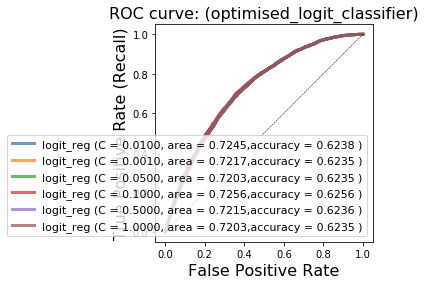

In [208]:
model_training_parameter(X_train_charge,y_train_charge,X_test_charge,y_test_charge,feature_selected)

## feature selection using recursive feature elimination

In [260]:
# rfe
selected=rfe_function(LogisticRegression(),30,X_train_charge,y_train_charge)

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Num Features: 30
Selected Features: [ True  True  True  True  True  True  True False False  True False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 2 3 1 4 5 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C = 0.0100  accuracy = 0.7024   AUC = 0.7791
C = 0.0010  accuracy = 0.7028   AUC = 0.7794
C = 0.0500  accuracy = 0.6989   AUC = 0.7768
C = 0.1000  accuracy = 0.7021   AUC = 0.7782
C = 0.5000  accuracy = 0.7088   AUC = 0.7828
C = 1.0000  accuracy = 0.7055   AUC = 0.7808


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


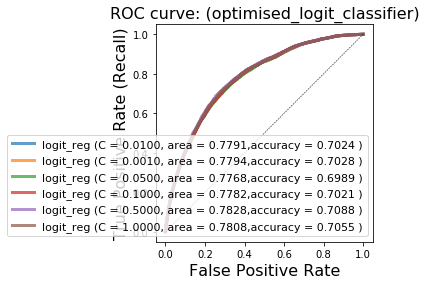

In [261]:
model_training_parameter(X_train_charge,y_train_charge,X_test_charge,y_test_charge,selected)

In [262]:
import matplotlib.pyplot as plt
#importing important libraries of machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Average precision-recall score: 0.62


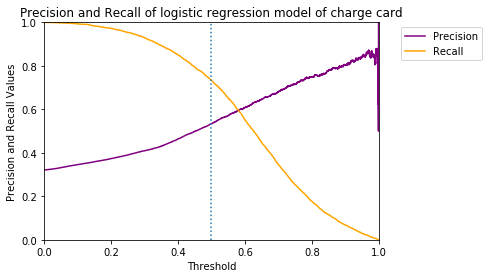

In [263]:
logit_reg = LogisticRegression(penalty = 'l2', C = 0.5,class_weight="balanced",dual=False).fit(X_train_charge[selected], y_train_charge)
y_score_logit_reg = logit_reg.predict_proba(X_test_charge[selected])
y_score_logit_train=logit_reg.predict_proba(X_train_charge[selected])
precision, recall, thresholds = precision_recall_curve(y_test_charge, y_score_logit_reg[:,1])
average_precision = average_precision_score(y_test_charge, y_score_logit_reg[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall of logistic regression model of charge card')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.5,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

## lending card

In [211]:
calculate_vif_(X_lend, thresh=8.0)## calling function that detect colliniearity

dropping 'mvar17' at index: 14
dropping 'mvar1' at index: 0
dropping 'mvar20' at index: 15
dropping 'mvar32' at index: 22
dropping 'mvar27' at index: 19
dropping 'mvar10' at index: 8
dropping 'mvar29' at index: 19
dropping 'mvar18' at index: 12
dropping 'mvar43' at index: 25
Remaining variables:
Index(['mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8', 'mvar9',
       'mvar12', 'mvar13', 'mvar14', 'mvar16', 'mvar19', 'mvar21', 'mvar24',
       'mvar25', 'mvar26', 'mvar28', 'mvar33', 'mvar34', 'mvar36', 'mvar37',
       'mvar38', 'mvar39', 'mvar42', 'mvar44', 'mvar46'],
      dtype='object')


,,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar12,mvar13,...,mvar28,mvar33,mvar34,mvar36,mvar37,mvar38,mvar39,mvar42,mvar44,mvar46
application_key,mvar47,,,,,,,,,,,,,,,,,,,,,
230033,L,0.809500,0.000,0.000,0.000,102.000000,7532.000000,3171.000000,18234.000000,765.000000,1931.000000,...,30386.0,0.416700,0.0,8.000000,0.000000,2.0,0.000000,0.00000,0.638360,0.118158
230035,L,0.219300,0.000,0.000,0.000,1982.000000,26440.000000,4955.000000,20316.000000,0.000000,0.000000,...,91.0,10.333300,0.0,3.000000,3.000000,2.0,0.000000,0.15385,0.532410,0.000000
230036,L,0.011800,0.225,0.000,0.000,5451.000000,5494.000000,5494.000000,7987.000000,2257.000000,27815.000000,...,487.0,0.916700,0.0,2.000000,3.000000,2.0,0.000000,0.00000,0.926650,0.181548
230040,L,0.135800,0.000,0.000,0.000,347.000000,38964.000000,17828.000000,70729.000000,16298.000000,18877.000000,...,1490.0,5.916700,0.0,6.000000,12.000000,2.0,0.000000,0.00000,0.898680,0.000000
230041,L,0.198100,0.000,0.000,0.000,793.000000,6131.000000,6045.000000,48959.000000,10565.000000,14282.000000,...,61.0,1.750000,0.0,10.000000,7.000000,0.0,0.000000,0.08824,0.338340,0.000000
230042,L,0.000000,0.000,0.000,0.000,22.000000,19518.000000,9910.000000,90618.000000,1323.000000,3513.000000,...,30386.0,15.666700,0.0,9.000000,11.000000,2.0,0.000000,0.00000,0.806200,0.000000
230048,L,0.097000,0.000,0.000,0.000,1015.000000,13379.000000,13379.000000,246906.000000,9133.000000,9815.000000,...,30386.0,9.528001,0.0,4.000000,26.000000,2.0,0.000000,0.00000,0.474800,0.000000
230049,L,8.774700,10.437,0.000,0.000,122.000000,623.000000,299.000000,1140.000000,1311.000000,520.000000,...,0.0,0.166700,0.0,8.000000,1.000000,12.0,0.000000,0.63636,0.949510,0.000000
230051,L,0.015500,0.368,0.000,0.000,424.000000,86509.000000,12451.000000,86635.000000,4922.000000,12569.000000,...,183.0,29.500000,1.0,8.000000,10.000000,2.0,0.000000,0.00000,0.347300,0.000000


In [249]:
feature_selected=['mvar1','mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8', 'mvar9',
       'mvar10', 'mvar12', 'mvar13', 'mvar14', 'mvar16', 'mvar19', 'mvar24',
       'mvar25', 'mvar26', 'mvar28', 'mvar29', 'mvar33', 'mvar34', 'mvar36',
       'mvar37', 'mvar38', 'mvar39', 'mvar42', 'mvar43', 'mvar44', 'mvar46']

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C = 0.0100  accuracy = 0.7275   AUC = 0.8223
C = 0.0010  accuracy = 0.7195   AUC = 0.8161
C = 0.0500  accuracy = 0.6948   AUC = 0.8084
C = 0.1000  accuracy = 0.6768   AUC = 0.7933
C = 0.5000  accuracy = 0.7351   AUC = 0.8249
C = 1.0000  accuracy = 0.7286   AUC = 0.8229


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


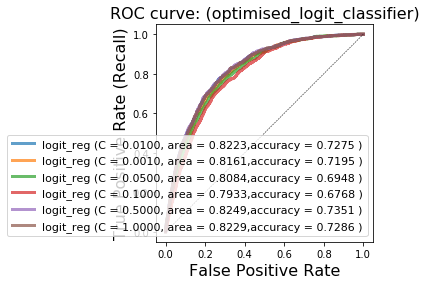

In [213]:
model_training_parameter(X_train_lend,y_train_lend,X_test_lend,y_test_lend,feature_selected)

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Num Features: 30
Selected Features: [ True  True  True  True  True False False  True False  True  True  True
 False  True  True  True  True  True  True  True  True False False  True
  True  True  True  True  True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 2 3 1 6 1 1 1 7 1 1 1 1 1 1 1 1 4 5 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C = 0.0100  accuracy = 0.7421   AUC = 0.8294
C = 0.0010  accuracy = 0.7366   AUC = 0.8274
C = 0.0500  accuracy = 0.7415   AUC = 0.8295
C = 0.1000  accuracy = 0.7405   AUC = 0.8289
C = 0.5000  accuracy = 0.7396   AUC = 0.8297
C = 1.0000  accuracy = 0.7376   AUC = 0.8273


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


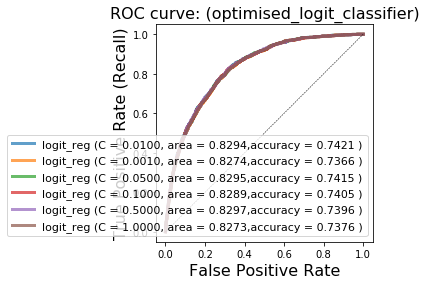

In [257]:
selected=rfe_function(LogisticRegression(),30,X_train_lend,y_train_lend)
model_training_parameter(X_train_lend,y_train_lend,X_test_lend,y_test_lend,selected)

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Average precision-recall score: 0.39


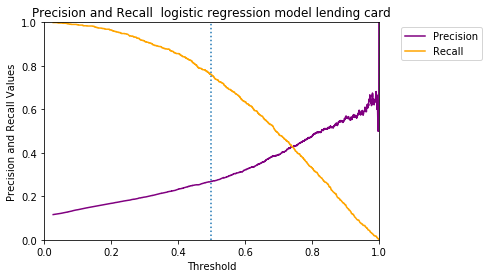

In [259]:
logit_reg = LogisticRegression(penalty = 'l2', C = 0.5,class_weight="balanced",dual=False).fit(X_train_lend[selected], y_train_lend)
y_score_logit_reg = logit_reg.predict_proba(X_test_lend[selected])
y_score_logit_train=logit_reg.predict_proba(X_train_lend[selected])
precision, recall, thresholds = precision_recall_curve(y_test_lend, y_score_logit_reg[:,1])
average_precision = average_precision_score(y_test_lend, y_score_logit_reg[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall  logistic regression model lending card')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.5,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

## Random forest

In [215]:
def model_training_parameter_rf(X_train,y_train,X_test,y_test,feature_selected):
    for g in [2, 4, 6,8,10,15,20]:
        rf = RandomForestClassifier(max_depth=g,random_state=0).fit(X_train[feature_selected], y_train)
        y_score_rf = rf.predict_proba(X_test[feature_selected])
        fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf[:,1])
        roc_auc_rf = auc(fpr_rf, tpr_rf)
        accuracy_rf = rf.score(X_test[feature_selected], y_test)
        print("MaxDepth = {:.2f}  accuracy = {:.4f}   AUC = {:.4f}".format(g, accuracy_rf, 
                                                                    roc_auc_rf))
        plt.plot(fpr_rf, tpr_rf, lw=3, alpha=0.7, 
             label='rf (Depth = {:0.2f}, area = {:0.4f},accuracy = {:.4f})'.format(g, roc_auc_rf,accuracy_rf))

    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
    plt.legend(loc="lower right", fontsize=11)
    plt.title('ROC curve: (Randomforest classifier)', fontsize=16)
    plt.axes().set_aspect('equal')
    return plt.show()

#### without feature selection

# charge card

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 2.00  accuracy = 0.7242   AUC = 0.7635


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 4.00  accuracy = 0.7411   AUC = 0.7809


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 6.00  accuracy = 0.7535   AUC = 0.7932


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 8.00  accuracy = 0.7546   AUC = 0.7941


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 10.00  accuracy = 0.7549   AUC = 0.7939


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 15.00  accuracy = 0.7384   AUC = 0.7750


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 20.00  accuracy = 0.7384   AUC = 0.7681


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


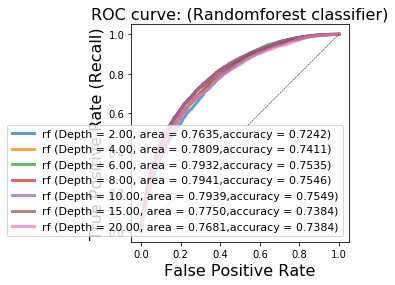

In [216]:
feature_selected=list(X_train_charge.columns)
model_training_parameter_rf(X_train_charge,y_train_charge,X_test_charge,y_test_charge,feature_selected)

### with rfe

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Num Features: 30
Selected Features: [ True  True  True False False  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False  True  True  True False  True  True  True  True]
Feature Ranking: [1 1 1 2 6 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 4 1 1 1 5 1 1 1 1]


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 2.00  accuracy = 0.7264   AUC = 0.7522


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 4.00  accuracy = 0.7393   AUC = 0.7752


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 6.00  accuracy = 0.7506   AUC = 0.7876


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 8.00  accuracy = 0.7550   AUC = 0.7927


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 10.00  accuracy = 0.7486   AUC = 0.7902


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 15.00  accuracy = 0.7402   AUC = 0.7747


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 20.00  accuracy = 0.7342   AUC = 0.7652


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


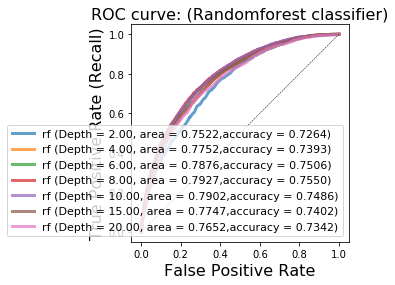

In [265]:
selected=rfe_function(RandomForestClassifier(),30,X_train_charge,y_train_charge)
model_training_parameter_rf(X_train_charge,y_train_charge,X_test_charge,y_test_charge,selected)

## without feature selection model performs better

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Average precision-recall score: 0.65


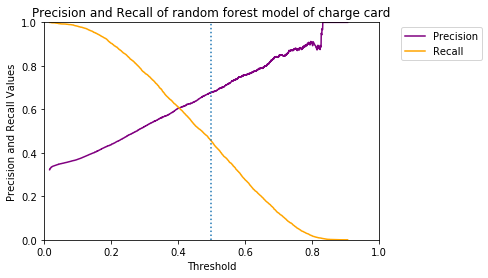

In [266]:
rf = RandomForestClassifier(max_depth=8,random_state=0).fit(X_train_charge[feature_selected], y_train_charge)
y_score_rf = rf.predict_proba(X_test_charge[feature_selected])
y_score_rf_train=rf.predict_proba(X_train_charge[feature_selected])
precision, recall, thresholds = precision_recall_curve(y_test_charge, y_score_rf[:,1])
average_precision = average_precision_score(y_test_charge, y_score_rf[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall of random forest model of charge card')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.5,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

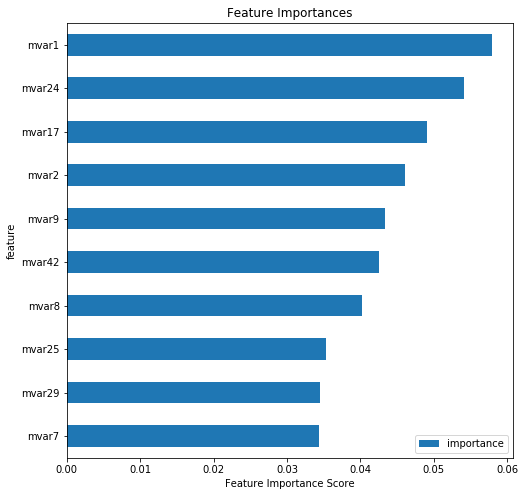

,importance
feature,
mvar7,0.034394
mvar29,0.034506
mvar25,0.035364
mvar8,0.040195
mvar42,0.042521
mvar9,0.043317
mvar2,0.046031
mvar17,0.049148
mvar24,0.054163


In [217]:
## feature importance
plot_feature_importances(RandomForestClassifier(), X_train_charge, y_train_charge, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances")

## lending card

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 2.00  accuracy = 0.8871   AUC = 0.8064


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 4.00  accuracy = 0.8913   AUC = 0.8196


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 6.00  accuracy = 0.8910   AUC = 0.8295


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 8.00  accuracy = 0.8936   AUC = 0.8289


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 10.00  accuracy = 0.8916   AUC = 0.8217


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 15.00  accuracy = 0.8867   AUC = 0.8022


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 20.00  accuracy = 0.8861   AUC = 0.7781


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


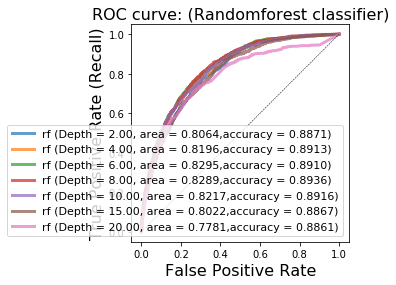

In [267]:
feature_selected=list(X_train_lend.columns)
model_training_parameter_rf(X_train_lend,y_train_lend,X_test_lend,y_test_lend,feature_selected)

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Average precision-recall score: 0.40


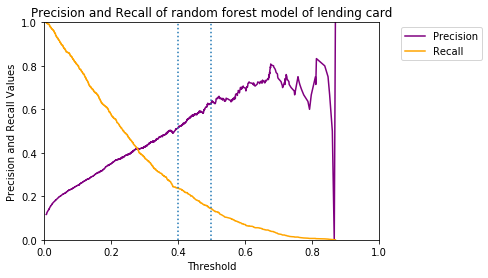

In [269]:
rf = RandomForestClassifier(max_depth=8,random_state=0).fit(X_train_lend[feature_selected], y_train_lend)
y_score_rf = rf.predict_proba(X_test_lend[feature_selected])
y_score_rf_train=rf.predict_proba(X_train_lend[feature_selected])
precision, recall, thresholds = precision_recall_curve(y_test_lend, y_score_rf[:,1])
average_precision = average_precision_score(y_test_lend, y_score_rf[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall of random forest model of lending card')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.5,linestyle=":")
plt.axvline(x=0.4,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

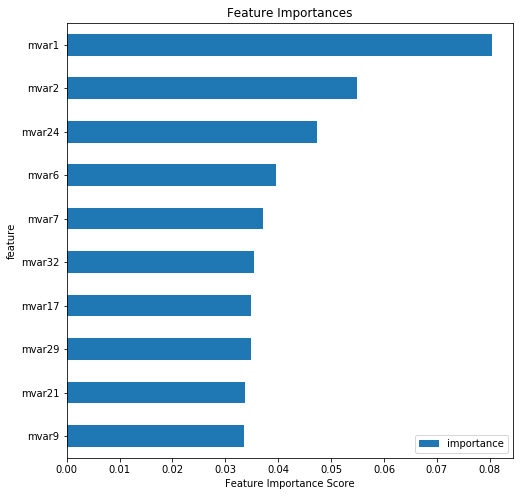

,importance
feature,
mvar9,0.033564
mvar21,0.033655
mvar29,0.034775
mvar17,0.034918
mvar32,0.035371
mvar7,0.037185
mvar6,0.039659
mvar24,0.047254
mvar2,0.054848


In [270]:
## feature importance
plot_feature_importances(RandomForestClassifier(), X_train_lend, y_train_lend, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances")

## RFE

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Num Features: 30
Selected Features: [ True  True  True False False  True  True  True  True  True  True  True
  True  True  True  True False False  True  True  True  True  True  True
  True  True  True False  True  True  True False  True  True  True  True]
Feature Ranking: [1 1 1 3 7 1 1 1 1 1 1 1 1 1 1 1 4 2 1 1 1 1 1 1 1 1 1 5 1 1 1 6 1 1 1 1]
MaxDepth = 2.00  accuracy = 0.8871   AUC = 0.7989


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 4.00  accuracy = 0.8885   AUC = 0.8183


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 6.00  accuracy = 0.8911   AUC = 0.8281


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 8.00  accuracy = 0.8928   AUC = 0.8260


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 10.00  accuracy = 0.8923   AUC = 0.8235


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 15.00  accuracy = 0.8905   AUC = 0.8052


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MaxDepth = 20.00  accuracy = 0.8840   AUC = 0.7876


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


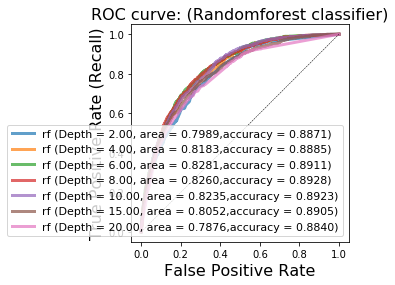

In [271]:
feature_selected=rfe_function(RandomForestClassifier(),30,X_train_lend,y_train_lend)
model_training_parameter_rf(X_train_lend,y_train_lend,X_test_lend,y_test_lend,feature_selected)

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Average precision-recall score: 0.39


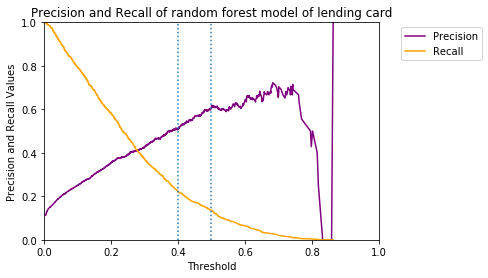

In [273]:
rf = RandomForestClassifier(max_depth=8,random_state=0).fit(X_train_lend[feature_selected], y_train_lend)
y_score_rf = rf.predict_proba(X_test_lend[feature_selected])
y_score_rf_train=rf.predict_proba(X_train_lend[feature_selected])
precision, recall, thresholds = precision_recall_curve(y_test_lend, y_score_rf[:,1])
average_precision = average_precision_score(y_test_lend, y_score_rf[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall of random forest model of lending card')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.5,linestyle=":")
plt.axvline(x=0.4,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

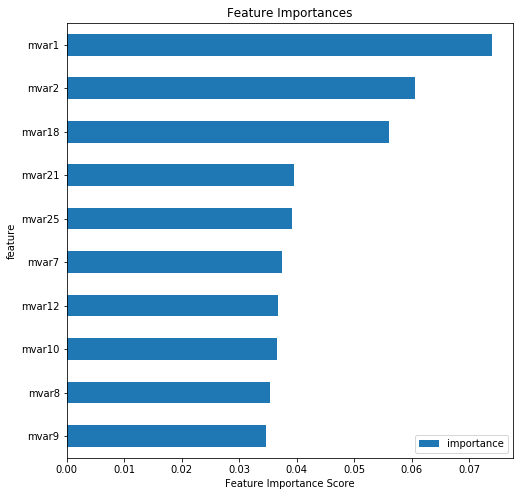

,importance
feature,
mvar9,0.034592
mvar8,0.035323
mvar10,0.036512
mvar12,0.036815
mvar7,0.037456
mvar25,0.039117
mvar21,0.039614
mvar18,0.056136
mvar2,0.060532


In [272]:
plot_feature_importances(RandomForestClassifier(), X_train_lend[feature_selected], y_train_lend, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances")

## XGBOOST

In [279]:
def predict_xgboost(x_train,y_train,x_test,y_test,feature_selected):
    xgb_model = xgb.XGBClassifier()
    parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [8,10],
              'min_child_weight': [6,8],
              'subsample': [0.7,0.8],
              'colsample_bytree': [0.6,0.7],
              'n_estimators': [100,200] #number of trees, change it to 1000 for better results
            }
    clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=3, 
                   scoring='roc_auc',
                   verbose=2, refit=True)

    clf.fit(x_train[feature_selected], y_train)
#     predict_train_proba=clf.predict_proba(x_train[feature_selected])
    y_score_xg=clf.predict_proba(x_test[feature_selected])
    best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
    print(best_parameters)
    print('Raw AUC score:', score)
    return y_score_xg

## charge card

In [274]:
print(X_train_charge.shape,X_test_charge.shape,X_train_lend.shape,X_test_lend.shape)

(36288, 35) (15552, 35) (19712, 36) (8448, 36)


In [295]:
feature_selected=list(X_train_charge.columns)

In [226]:
%%time
feature_selected=list(X_train_charge.columns)
y_score_xg=predict_xgboost(X_train_charge,y_train_charge,X_test_charge,y_test_charge,feature_selected)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  3.0min
[Parallel(n_jobs=5)]: Done  96 out of  96 | elapsed:  9.9min finished
C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 8, 'min_child_weight': 8, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.7}
Raw AUC score: 0.7953639361743279
Wall time: 10min 3s


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


###### PRECISION AND RECALL CURVE

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 accuracy = 0.7658   AUC = 0.8072
Average precision-recall score: 0.67


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


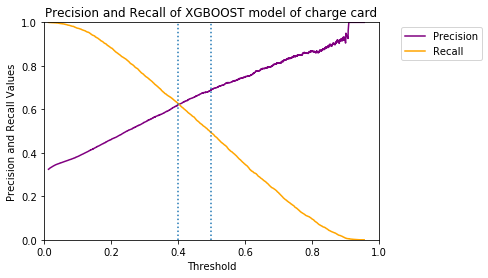

In [298]:
xgb = XGBClassifier(colsample_bytree= 0.6, learning_rate=0.05, max_depth= 8, min_child_weight= 8, 
                       n_estimators=100, objective= 'binary:logistic', subsample= 0.7).fit(X_train_charge[feature_selected], y_train_charge)
y_score_xgb = xgb.predict_proba(X_test_charge[feature_selected])
y_score_xgb_train=xgb.predict_proba(X_train_charge[feature_selected])
fpr_xg, tpr_xg, _ = roc_curve(y_test_charge, y_score_xgb[:,1])
roc_auc_xgb = auc(fpr_xg, tpr_xg)
accuracy_xgb = xgb.score(X_test_charge[feature_selected], y_test_charge)
precision, recall, thresholds = precision_recall_curve(y_test_charge, y_score_xgb[:,1])
average_precision = average_precision_score(y_test_charge, y_score_xgb[:,1])
print(" accuracy = {:.4f}   AUC = {:.4f}".format(accuracy_xgb, 
                                                                    roc_auc_xgb))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall of XGBOOST model of charge card')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.5,linestyle=":")
plt.axvline(x=0.4,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

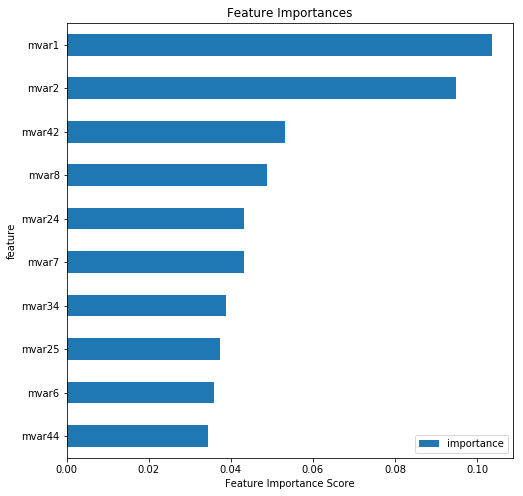

,importance
feature,
mvar44,0.034532
mvar6,0.035971
mvar25,0.037410
mvar34,0.038849
mvar7,0.043165
mvar24,0.043165
mvar8,0.048921
mvar42,0.053237
mvar2,0.094964


In [289]:
plot_feature_importances(XGBClassifier(), X_train_charge[feature_selected], y_train_charge, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances")

## lending card

In [299]:
feature_selected=list(X_train_lend.columns)

In [227]:
feature_selected=list(X_train_lend.columns)
predict_xgboost(X_train_lend,y_train_lend,X_test_lend,y_test_lend,feature_selected)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  1.7min
[Parallel(n_jobs=5)]: Done  96 out of  96 | elapsed:  5.2min finished
C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 8, 'min_child_weight': 8, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.8}
Raw AUC score: 0.8474007950307947


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


array([[0.7344012 , 0.26559874],
       [0.97156334, 0.02843667],
       [0.961191  , 0.03880899],
       ...,
       [0.88853544, 0.11146455],
       [0.822982  , 0.177018  ],
       [0.9612092 , 0.03879081]], dtype=float32)

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 accuracy = 0.8937   AUC = 0.8403
Average precision-recall score: 0.42


C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


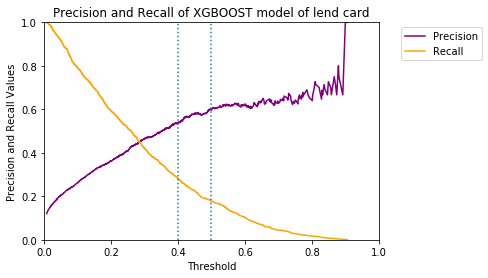

In [300]:
xgb = XGBClassifier(colsample_bytree= 0.6, learning_rate=0.05, max_depth= 8, min_child_weight= 8, 
                       n_estimators=100, objective= 'binary:logistic', subsample= 0.8).fit(X_train_lend[feature_selected], y_train_lend)
y_score_xgb = xgb.predict_proba(X_test_lend[feature_selected])
y_score_xgb_train=xgb.predict_proba(X_train_lend[feature_selected])

fpr_xg, tpr_xg, _ = roc_curve(y_test_lend, y_score_xgb[:,1])
roc_auc_xgb = auc(fpr_xg, tpr_xg)
accuracy_xgb = xgb.score(X_test_lend[feature_selected], y_test_lend)
precision, recall, thresholds = precision_recall_curve(y_test_lend, y_score_xgb[:,1])
average_precision = average_precision_score(y_test_lend, y_score_xgb[:,1])
print(" accuracy = {:.4f}   AUC = {:.4f}".format(accuracy_xgb, roc_auc_xgb))


precision, recall, thresholds = precision_recall_curve(y_test_lend, y_score_xgb[:,1])
average_precision = average_precision_score(y_test_lend, y_score_xgb[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall of XGBOOST model of lend card')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.5,linestyle=":")
plt.axvline(x=0.4,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

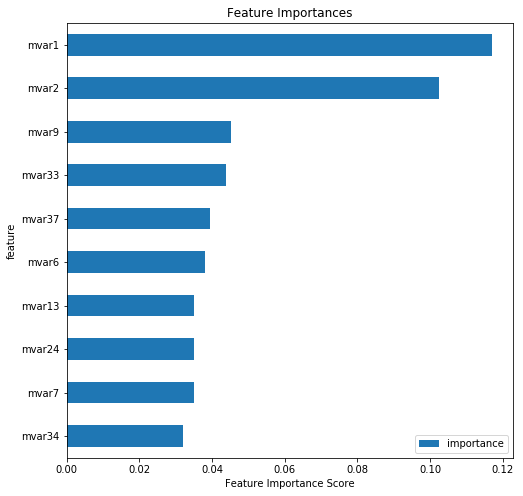

,importance
feature,
mvar34,0.032164
mvar7,0.035088
mvar24,0.035088
mvar13,0.035088
mvar6,0.038012
mvar37,0.039474
mvar33,0.043860
mvar9,0.045322
mvar2,0.102339


In [301]:
plot_feature_importances(XGBClassifier(), X_train_lend[feature_selected], y_train_lend, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances")

## GBM

In [228]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

C:\Users\DELL LAPTOP\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [235]:
def modelfit(alg, dtrain, predictors,x_test,y_test, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain,predictors)
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
    predict_proba_test_class=alg.predict(x_test)

    predict_proba_test=alg.predict_proba(x_test)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain, predictors, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(predictors, dtrain_predictions))
    print ("Accuracy test: %.4g" % metrics.accuracy_score(y_test, predict_proba_test_class))
    print( "AUC Score (test): %f" % metrics.roc_auc_score(y_test, predict_proba_test))
    print( "AUC Score (Train): %f" % metrics.roc_auc_score(predictors, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        )
    return predict_proba_test

In [236]:
gbm_tuned_1=GradientBoostingClassifier(learning_rate=0.1,random_state=10,max_depth=5,max_features=13,min_samples_leaf=60,min_samples_split=800,n_estimators=90,subsample=0.8)

## charge

In [237]:
predict_proba_test_1=modelfit(gbm_tuned_1, X_train_charge.values, y_train_charge.default_ind.values,X_test_charge.values,y_test_charge.values)


Model Report
Accuracy : 0.777
Accuracy : 0.7679
AUC Score (test): 0.807929
AUC Score (Train): 0.824522
CV Score : Mean - 0.7986884 | Std - 0.002922923 | Min - 0.7941805 | Max - 0.8029344



Model Report
Accuracy : 0.777
Accuracy : 0.7679
AUC Score (test): 0.807929
AUC Score (Train): 0.824522
CV Score : Mean - 0.7986884 | Std - 0.002922923 | Min - 0.7941805 | Max - 0.8029344
Average precision-recall score: 0.67


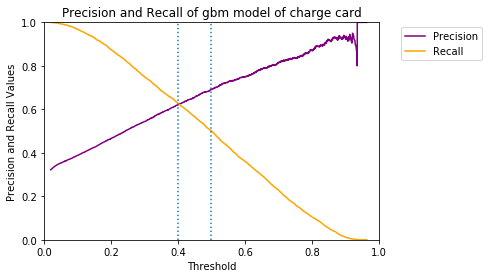

In [285]:
y_score_gbm=modelfit(gbm_tuned_1, X_train_charge.values, y_train_charge.default_ind.values,X_test_charge.values,y_test_charge.values)
precision, recall, thresholds = precision_recall_curve(y_test_charge, y_score_gbm)
average_precision = average_precision_score(y_test_charge, y_score_gbm)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall of gbm model of charge card')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.5,linestyle=":")
plt.axvline(x=0.4,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

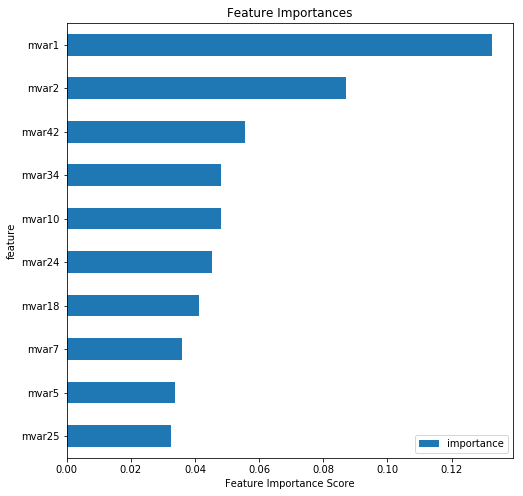

,importance
feature,
mvar25,0.032394
mvar5,0.033777
mvar7,0.036004
mvar18,0.041340
mvar24,0.045204
mvar10,0.048074
mvar34,0.048126
mvar42,0.055527
mvar2,0.086961


In [294]:
plot_feature_importances(GradientBoostingClassifier(), X_train_charge[feature_selected], y_train_charge, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances")

## lending

In [239]:
predict_proba_test_1=modelfit(gbm_tuned_1, X_train_lend.values, y_train_lend.default_ind.values,X_test_lend.values,y_test_lend.values)


Model Report
Accuracy : 0.9087
Accuracy : 0.8942
AUC Score (test): 0.839450
AUC Score (Train): 0.883571
CV Score : Mean - 0.8468163 | Std - 0.00474315 | Min - 0.8428085 | Max - 0.8557845



Model Report
Accuracy : 0.9087
Accuracy : 0.8942
AUC Score (test): 0.839450
AUC Score (Train): 0.883571
CV Score : Mean - 0.8468163 | Std - 0.00474315 | Min - 0.8428085 | Max - 0.8557845
Average precision-recall score: 0.42


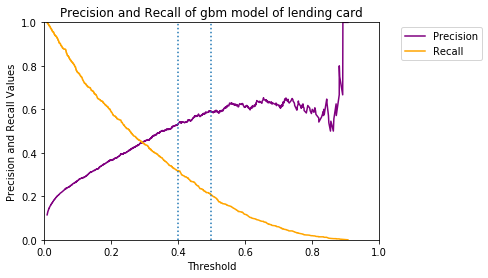

In [286]:
y_score_gbm=modelfit(gbm_tuned_1, X_train_lend.values, y_train_lend.default_ind.values,X_test_lend.values,y_test_lend.values)
precision, recall, thresholds = precision_recall_curve(y_test_lend, y_score_gbm)
average_precision = average_precision_score(y_test_lend, y_score_gbm)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall of gbm model of lending card')
plt.plot(thresholds,precision[1:],'purple',label='Precision')
plt.plot(thresholds,recall[1:],'orange', label='Recall')
plt.axvline(x=0.5,linestyle=":")
plt.axvline(x=0.4,linestyle=":")
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')
plt.show()

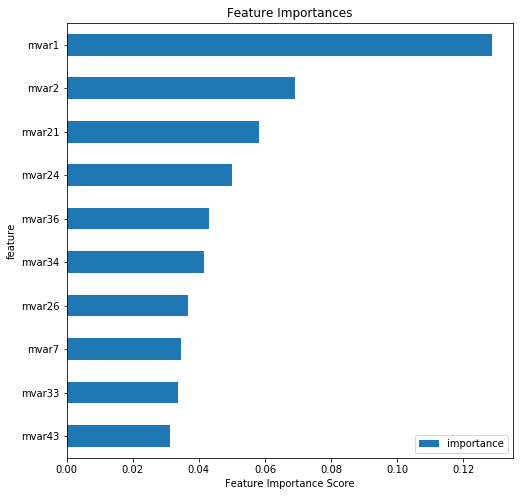

,importance
feature,
mvar43,0.031365
mvar33,0.033547
mvar7,0.034732
mvar26,0.036689
mvar34,0.041586
mvar36,0.042959
mvar24,0.049881
mvar21,0.058343
mvar2,0.069151


In [292]:
plot_feature_importances(GradientBoostingClassifier(), X_train_lend[feature_selected], y_train_lend, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances")